# NOAA Dataset: Exploratory Data Analysis

### 1. Setup and Data Loading
This section handles the initial setup, including importing necessary libraries and loading the datasets into a unified DataFrame.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [4]:
files = ['../data/NOAA_46041.csv', '../data/NOAA_46050.csv', '../data/NOAA_46243.csv']
dataframes = [pd.read_csv(file) for file in files]
df = pd.concat(dataframes, ignore_index=True)

df['date_time'] = pd.to_datetime(df['date_time'])

df.head()

,station_id,latitude (degrees north),longitude (degrees east),date_time,air_temperature (C°),sea_level_pressure (hPa),wind_speed (m/s),gust_speed (m/s),significant_wave_height (m),dominant_wave_period (s),sea_surface_temperature (C°),wind_speed_cwind (m/s)
0,2868187,47.348999,-124.708,2013-04-18 00:50:00+00:00,7.2,1032.599976,5.0,8.0,1.0,8.0,10.1,NaN
1,2868187,47.348999,-124.708,2013-04-18 01:50:00+00:00,6.8,1032.300049,4.0,5.0,1.1,6.0,10.0,NaN
2,2868187,47.348999,-124.708,2013-04-18 02:50:00+00:00,6.9,1031.800049,3.0,4.0,1.1,7.0,10.0,NaN
3,2868187,47.348999,-124.708,2013-04-18 03:50:00+00:00,7.0,1031.699951,2.0,3.0,1.0,6.0,9.9,NaN
4,2868187,47.348999,-124.708,2013-04-18 04:50:00+00:00,7.1,1031.900024,1.0,2.0,0.9,8.0,9.9,NaN


### 2. Initial Data Exploration
A preliminary investigation into the dataset's structure, data types, and basic statistical properties.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7219 entries, 0 to 7218
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   station_id                    7219 non-null   int64              
 1   latitude (degrees north)      7219 non-null   float64            
 2   longitude (degrees east)      7219 non-null   float64            
 3   date_time                     7219 non-null   datetime64[ns, UTC]
 4   air_temperature (C°)          723 non-null    float64            
 5   sea_level_pressure (hPa)      723 non-null    float64            
 6   wind_speed (m/s)              723 non-null    float64            
 7   gust_speed (m/s)              723 non-null    float64            
 8   significant_wave_height (m)   2167 non-null   float64            
 9   dominant_wave_period (s)      2167 non-null   float64            
 10  sea_surface_temperature (C°)  2168 n

In [6]:
df.describe()

,station_id,latitude (degrees north),longitude (degrees east),air_temperature (C°),sea_level_pressure (hPa),wind_speed (m/s),gust_speed (m/s),significant_wave_height (m),dominant_wave_period (s),sea_surface_temperature (C°),wind_speed_cwind (m/s)
count,7.219000e+03,7219.000000,7219.000000,723.000000,723.000000,723.000000,723.000000,2167.000000,2167.000000,2168.000000,4320.000000
mean,2.872875e+06,45.226075,-124.470156,9.872752,1021.996403,5.063624,6.203320,1.304799,8.854176,11.113745,5.894028
std,8.068716e+03,0.942759,0.178761,1.409472,5.944653,2.339908,2.721901,0.455453,2.748450,1.280569,2.735111
min,2.868187e+06,44.639000,-124.708000,6.600000,1007.700012,0.000000,0.000000,0.400000,3.000000,8.500000,0.000000
25%,2.868934e+06,44.639000,-124.533997,8.800000,1017.599976,3.000000,4.000000,1.000000,7.000000,10.300000,3.800000
50%,2.868934e+06,44.639000,-124.533997,9.900000,1022.599976,5.000000,6.000000,1.300000,8.000000,10.900000,5.800000
75%,2.868934e+06,46.216000,-124.533997,10.900000,1025.599976,7.000000,8.000000,1.600000,10.000000,11.800000,8.100000
max,2.888997e+06,47.348999,-124.127998,14.700000,1035.699951,12.000000,16.000000,3.100000,18.000000,15.500000,12.100000


### 3. Feature Analysis and Context
A detailed breakdown of each feature, providing context for its relevance in oceanographic and atmospheric science.

- **station_id**: Unique identifier for each NOAA buoy.
- **latitude, longitude**: Geographic coordinates of the buoy.
- **date_time**: Timestamp of the recorded observation.
- **air_temperature (C°)**: Air temperature in Celsius.
- **sea_level_pressure (hPa)**: Atmospheric pressure at sea level in hectopascals.
- **wind_speed (m/s)**: Wind speed in meters per second.
- **gust_speed (m/s)**: Peak wind speed in meters per second over a short interval.
- **significant_wave_height (m)**: Average height of the highest one-third of waves, a key measure for sea state.
- **dominant_wave_period (s)**: The period of the most energetic waves in seconds.
- **sea_surface_temperature (C°)**: Sea surface temperature in Celsius.

### 4. Data Aggregation
Summarizing data by different time granularities to observe broader trends.

In [7]:
df_daily = df.set_index('date_time').resample('D').mean()
df_monthly = df.set_index('date_time').resample('M').mean()

print("Daily Aggregation Head:")
print(df_daily.head())
print("\nMonthly Aggregation Head:")
print(df_monthly.head())

Daily Aggregation Head:
                             station_id  latitude (degrees north)  \
date_time                                                           
2013-04-18 00:00:00+00:00  2.872824e+06                 45.212315   
2013-04-19 00:00:00+00:00  2.873009e+06                 45.252035   
2013-04-20 00:00:00+00:00  2.872973e+06                 45.240436   
2013-04-21 00:00:00+00:00  2.872892e+06                 45.216514   
2013-04-22 00:00:00+00:00  2.872736e+06                 45.217075   

                           longitude (degrees east)  air_temperature (C°)  \
date_time                                                                   
2013-04-18 00:00:00+00:00               -124.470636              8.091304   
2013-04-19 00:00:00+00:00               -124.468332              9.058333   
2013-04-20 00:00:00+00:00               -124.468561              8.225000   
2013-04-21 00:00:00+00:00               -124.469202              8.213043   
2013-04-22 00:00:00+00:00     

/tmp/ipykernel_41600/2777311392.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.set_index('date_time').resample('M').mean()


### 5. Data Visualization

#### Univariate Analysis
Visualizing the distribution of individual features to understand their characteristics.

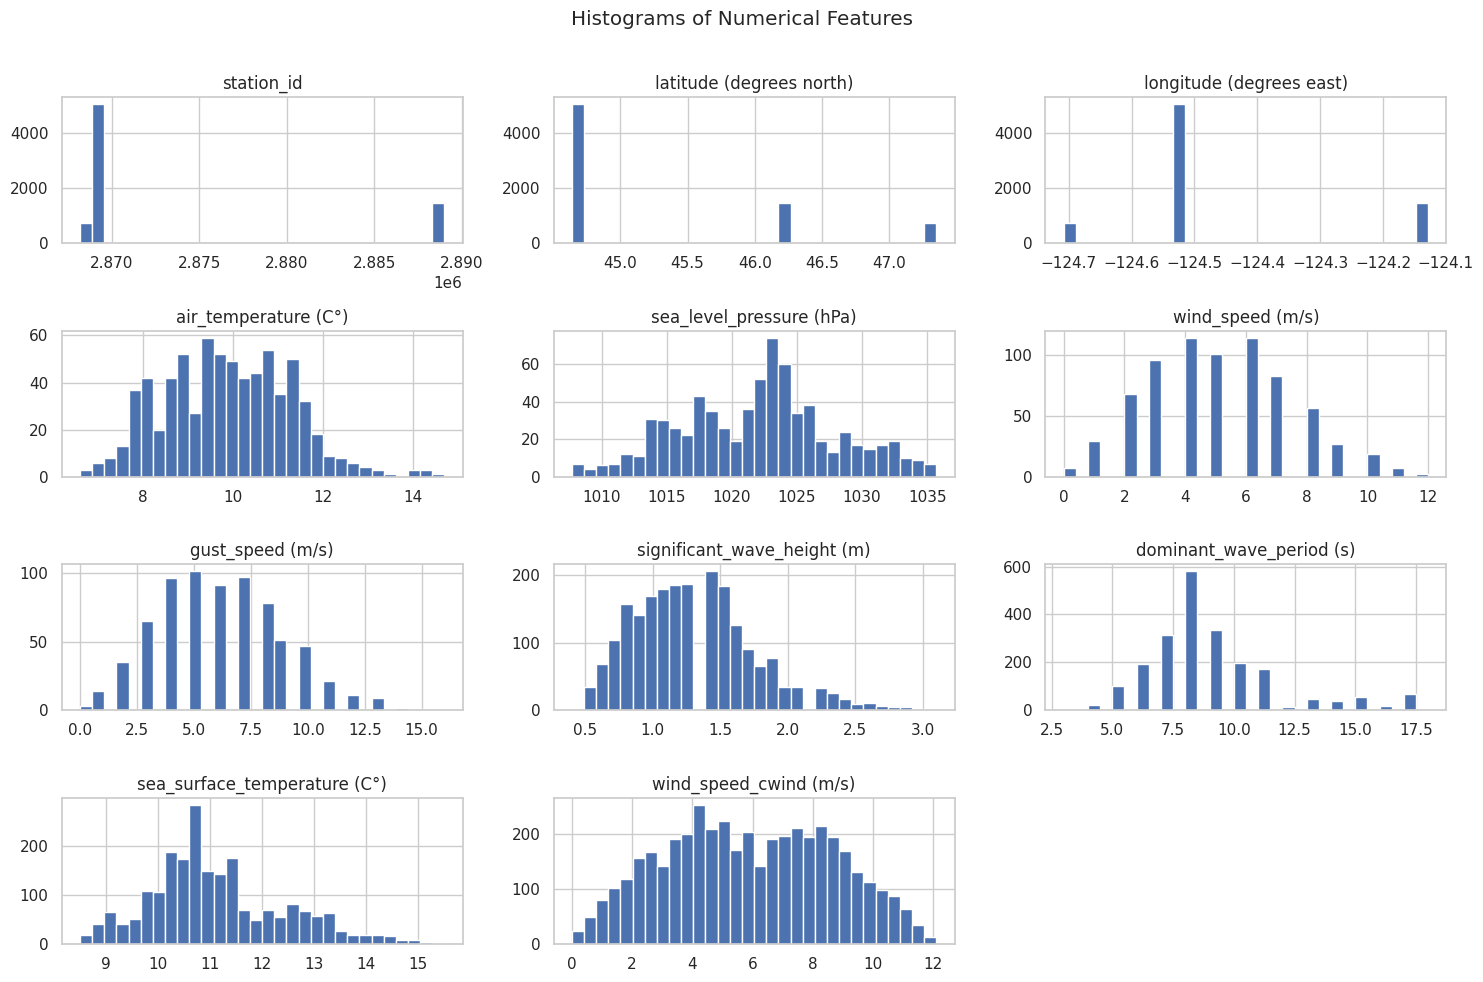

In [8]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
df[numerical_cols].hist(bins=30, figsize=(15, 10), layout=(4, 3))
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

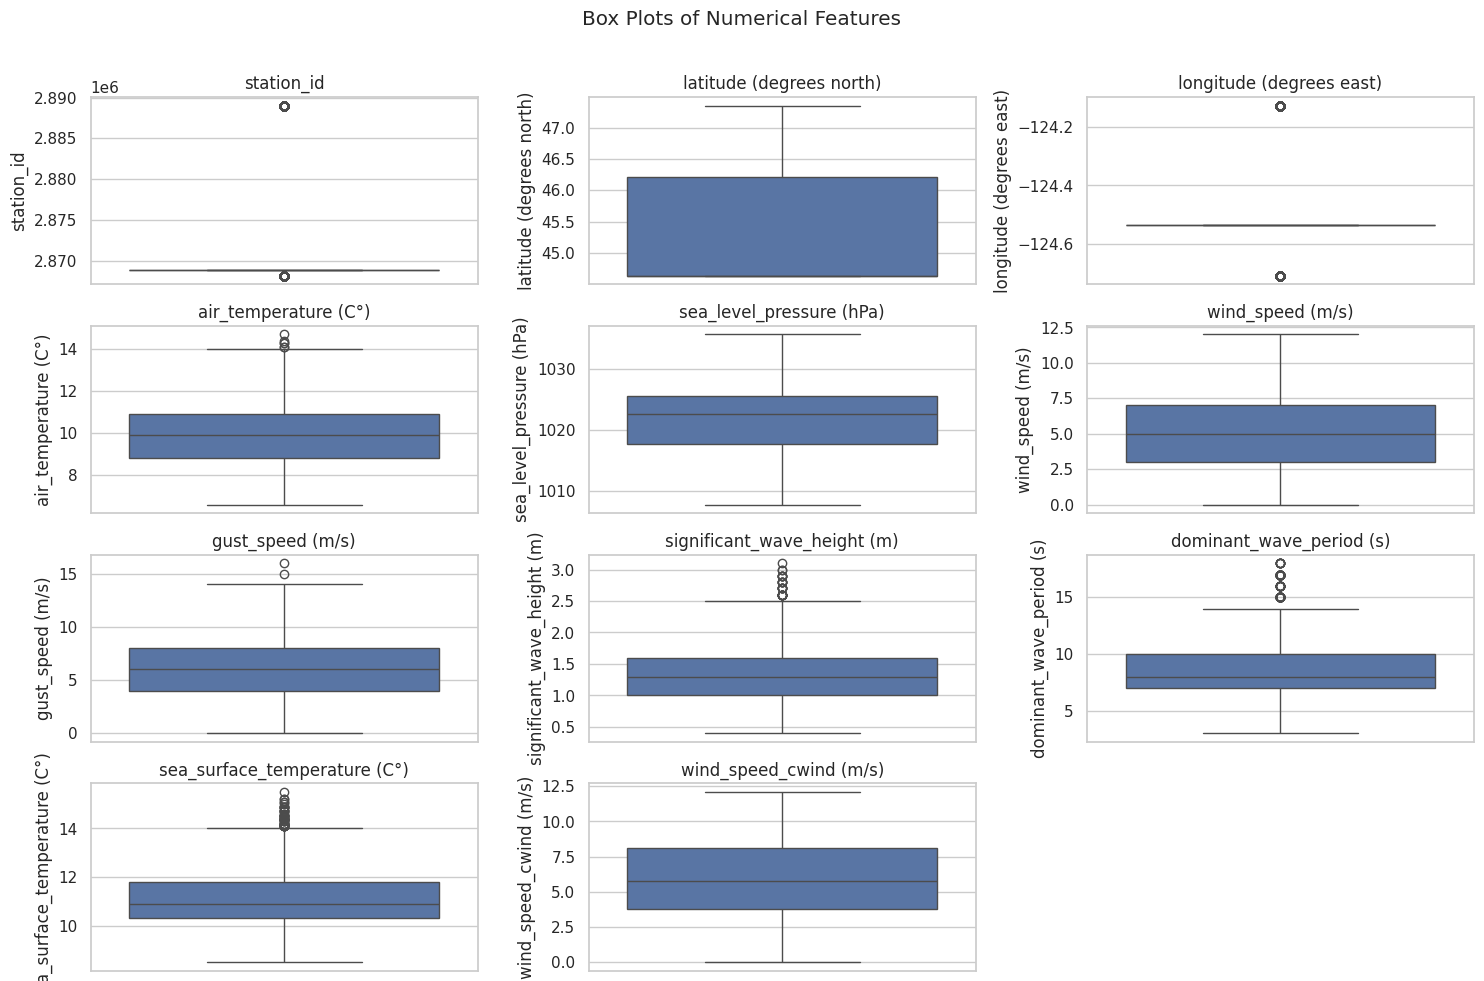

In [9]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.suptitle('Box Plots of Numerical Features')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

#### Multivariate Analysis
Examining the relationships between different features.

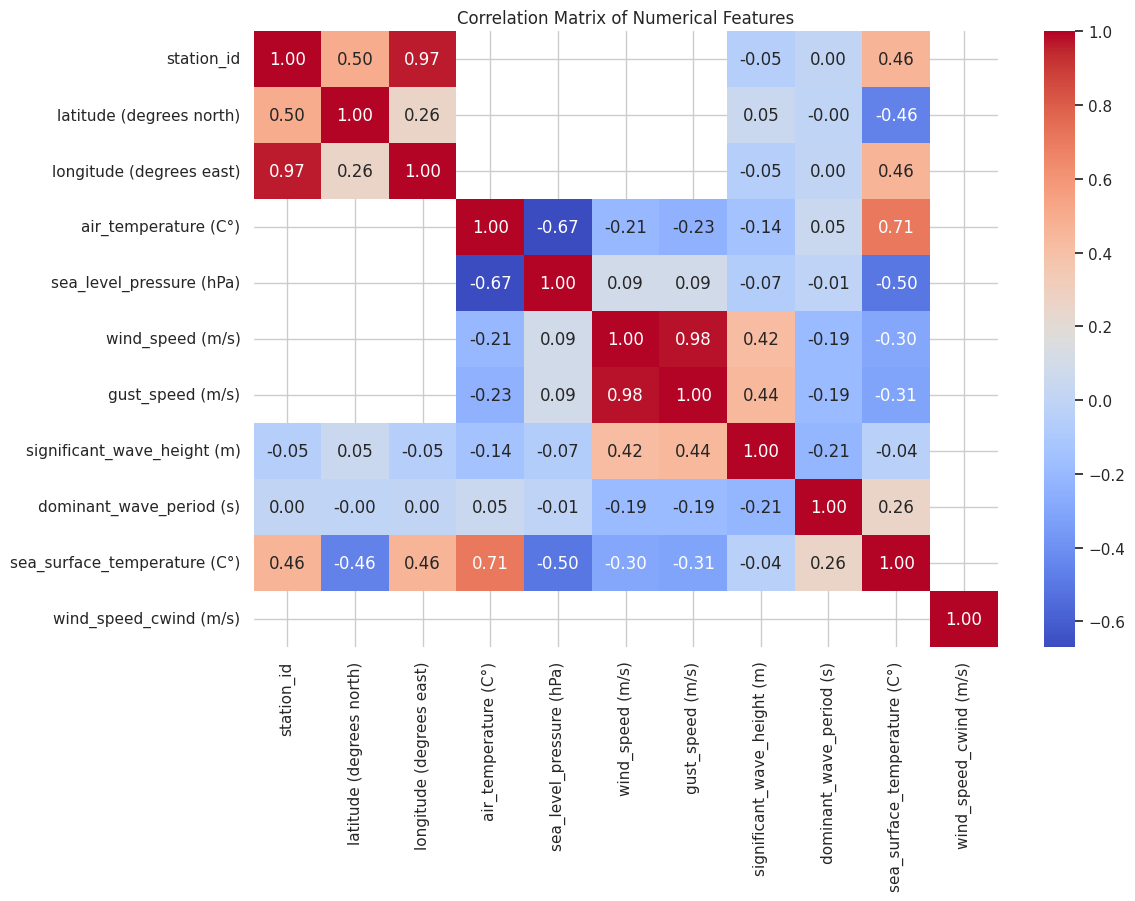

In [10]:
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

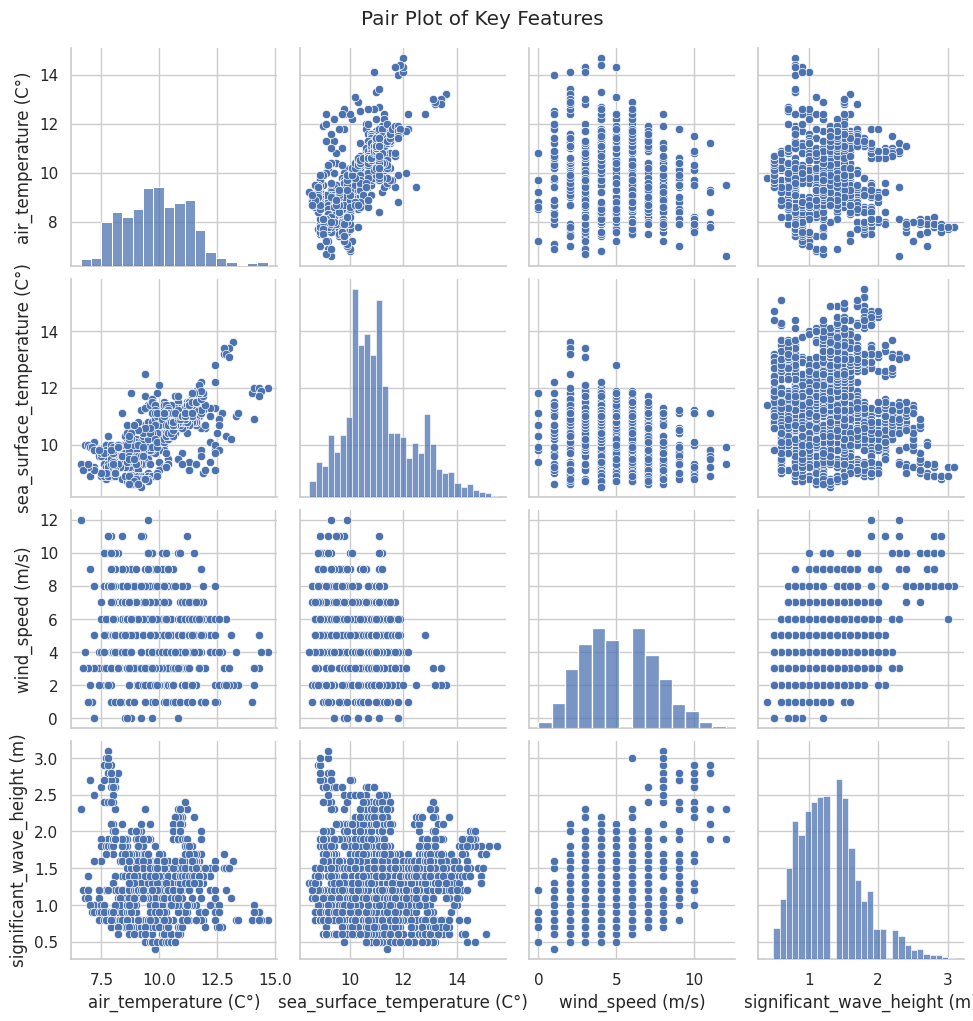

In [11]:
sns.pairplot(df[['air_temperature (C°)', 'sea_surface_temperature (C°)', 'wind_speed (m/s)', 'significant_wave_height (m)']])
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

#### Time-Series Analysis
Visualizing how key variables change over time.

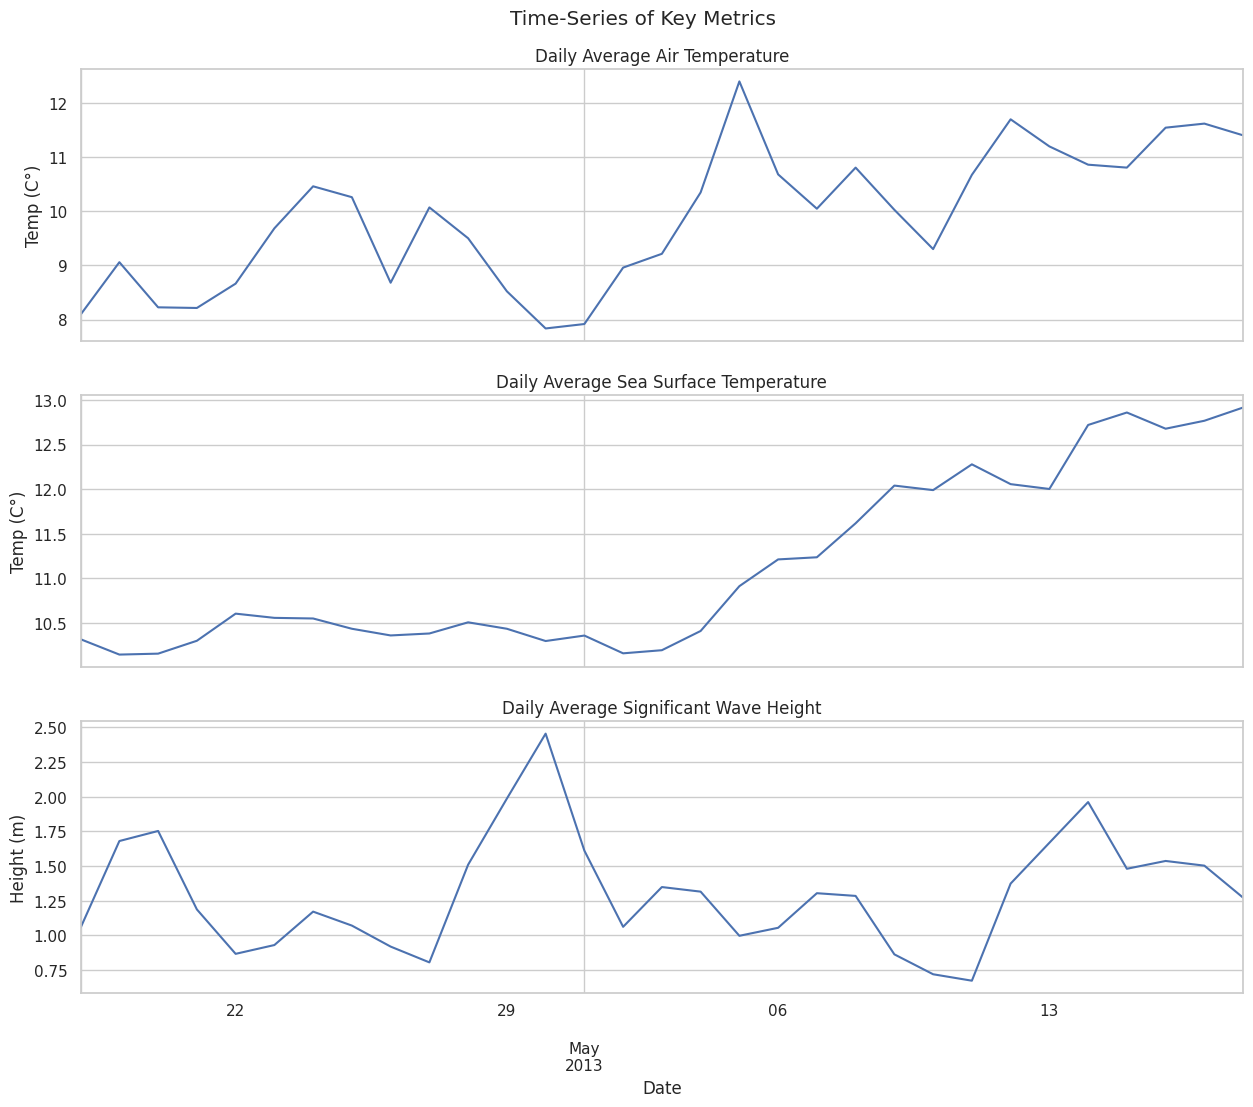

In [12]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)

df_daily['air_temperature (C°)'].plot(ax=axes[0], title='Daily Average Air Temperature')
axes[0].set_ylabel('Temp (C°)')

df_daily['sea_surface_temperature (C°)'].plot(ax=axes[1], title='Daily Average Sea Surface Temperature')
axes[1].set_ylabel('Temp (C°)')

df_daily['significant_wave_height (m)'].plot(ax=axes[2], title='Daily Average Significant Wave Height')
axes[2].set_ylabel('Height (m)')

plt.xlabel('Date')
plt.suptitle('Time-Series of Key Metrics', y=0.93)
plt.show()